In [1]:
import sys
sys.path.insert(0, '/home/emmanuel/code/py_packages/rbig/')
sys.path.insert(0, '/home/emmanuel/code/rbig/')
sys.path.insert(0, '/Users/eman/Documents/code_projects/rbig/')

from rbig.univariate import MarginalUniformization, InverseCDF
import numpy as np
import warnings
from sklearn.utils import check_random_state
import scipy
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [2]:
seed = 123
rng = np.random.RandomState(seed=seed)

num_samples = 1000
noise = 0.25

X = np.abs(2 * rng.randn(num_samples, 1))
Y = np.sin(X) + noise * rng.randn(num_samples, 1)


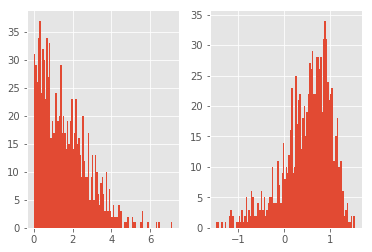

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(X, bins=100)
ax[1].hist(Y, bins=100)
plt.show()

### Marginal Uniformization

In [19]:
mg_uniformer = MarginalUniformization(cdf_precision=100, pdf_extension=0.1)
# mg_uniformer.

X_uni = mg_uniformer.fit_transform(X)
Y_uni = mg_uniformer.fit_transform(Y)

mg_uniformer.fit(X)
X_uni = mg_uniformer.transform(X)
X_approx = mg_uniformer.inverse_transform(X_uni)

mg_uniformer.fit(Y)
Y_uni = mg_uniformer.transform(Y)
Y_approx = mg_uniformer.inverse_transform(Y_uni)

In [22]:
pdf = mg_uniformer.logpdf(X).sum()
print(pdf)

ent = mg_uniformer.entropy(X, correction=True).sum()
print(ent)

-54.27335737666236
5.850686769757757


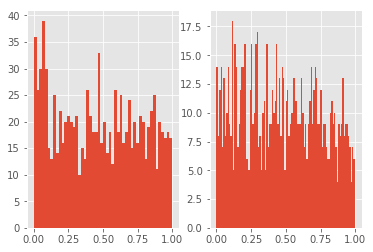

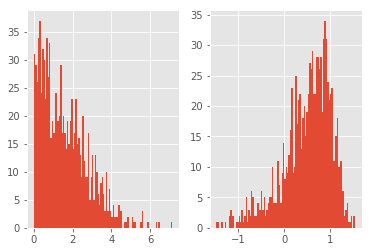

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(X_uni, bins=50)
ax[1].hist(Y_uni, bins=100)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(X_approx, bins=100)
ax[1].hist(Y_approx, bins=100)
plt.show()

### Marginal Gaussianization

In [8]:
mg_gauss = InverseCDF()
X_gauss = mg_gauss.fit_transform(X_uni)
Y_gauss = mg_gauss.fit_transform(Y_uni)


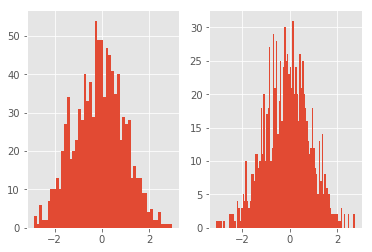

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(X_gauss, bins=50)
ax[1].hist(Y_gauss, bins=100)
plt.show()